# Part I

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
import random
import statsmodels.api as sm
import sklearn.model_selection as ms
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:
raw_orders = pd.read_csv('Orders.csv')
raw_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [27]:
raw_orders.columns = list(map(lambda x: x.replace('.', '_'), raw_orders.columns))
raw_orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [28]:
raw_orders.shape

(51290, 24)

In [29]:
raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Customer_ID     51290 non-null  object 
 6   Customer_Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal_Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product_ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub_Category    51290 non-null  object 
 17  Product_Name    51290 non-null 

In [30]:
np.sum(raw_orders.isnull())

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
Postal_Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [31]:
raw_orders.describe()

,Row_ID,Postal_Code,Quantity,Discount,Shipping_Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [32]:
raw_orders.Country.unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Philippines', 'Austria', 'Colombia', 'Netherlands',
       'Malaysia', 'Ecuador', 'Thailand', 'Somalia', 'Guatemala',
       'Belarus', 'Cambodia', 'South Africa', 'Canada', 'Japan', 'Russia',
       'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina', 'Lesotho',
       'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon', 'Hungary',
       'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland', 'Ghana',
       'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland', 'Albania',
       'Chad', 'Montenegro', 'Namibia', 'Portugal', 'Madagascar',
       'Sweden', 'Myanmar 

In [33]:
raw_orders.Quantity.value_counts()

2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: Quantity, dtype: int64

## Problem 1

In [34]:
raw_orders[['Profit']]

,Profit
0,$62.15
1,-$288.77
2,$919.97
3,-$96.54
4,$311.52
...,...
51285,$4.50
51286,$3.34
51287,$2.48
51288,$2.40


In [35]:
raw_orders.Sales

0          $221.98
1        $3,709.40
2        $5,175.17
3        $2,892.51
4        $2,832.96
           ...    
51285       $65.10
51286       $16.72
51287        $8.56
51288       $13.44
51289       $61.38
Name: Sales, Length: 51290, dtype: object

In [36]:
data_orders = raw_orders.copy()

In [37]:
data_orders['Profit'] = data_orders['Profit'].map(lambda x: float(x.replace('$', '').replace(',', '')))
data_orders[['Profit']].head()

,Profit
0,62.15
1,-288.77
2,919.97
3,-96.54
4,311.52


In [38]:
data_orders['Sales'] = data_orders['Sales'].map(lambda x: float(x.replace('$', '').replace(',', '')))
data_orders[['Sales']].head()

,Sales
0,221.98
1,3709.40
2,5175.17
3,2892.51
4,2832.96


In [39]:
data_orders.dtypes

Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
Postal_Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product_ID         object
Category           object
Sub_Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

## Problem 2

### #1

In [40]:
season_data = data_orders.copy()

In [41]:
import datetime

season_data['Order_M_Y'] = pd.to_datetime(season_data['Order_Date']).dt.to_period('M')
season_data['Ship_M_Y'] = pd.to_datetime(season_data['Ship_Date']).dt.to_period('M')
season_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014-11,2014-11
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014-02,2014-02
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014-10,2014-10
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014-01,2014-01
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014-11,2014-11


In [42]:
# should change the Order.Date to reflect the months of the seasons

season_data = season_data.sort_values('Order_M_Y', ascending=True)
season_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y
9257,11999,ES-2012-RP1985548-40920,1/12/12,1/19/12,Standard Class,RP-1985548,Roy Phan,Corporate,NaN,Lohne,Lower Saxony,Germany,Western Europe,Europe,FUR-BO-4867,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",551.61,5,0.1,165.36,35.98,Medium,2012-01,2012-01
12684,48120,MG-2012-SH997584-40929,1/21/12,1/27/12,Standard Class,SH-997584,Sally Hughsby,Corporate,NaN,Ulan Bator,Ulaanbaatar,Mongolia,Eastern Asia,Asia Pacific,FUR-CH-5447,Furniture,Chairs,"Office Star Rocking Chair, Black",276.96,2,0.0,55.38,24.75,Medium,2012-01,2012-01
31883,9273,MX-2012-VG2179018-40926,1/18/12,1/23/12,Standard Class,VG-2179018,Vivek Gonzalez,Consumer,NaN,Manaus,Amazonas,Brazil,South America,LATAM,OFF-FA-5462,Office Supplies,Fasteners,"OIC Clamps, 12 Pack",38.40,3,0.0,6.12,4.70,Medium,2012-01,2012-01
2709,30450,ID-2012-KL1664592-40911,1/3/12,1/9/12,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,Auckland,New Zealand,Oceania,Asia Pacific,TEC-CO-4593,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.46,4,0.4,-319.46,107.10,Low,2012-01,2012-01
34012,15911,IT-2012-DP1300045-40916,1/8/12,1/14/12,Standard Class,DP-1300045,Darren Powers,Consumer,NaN,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Western Europe,Europe,OFF-AR-3499,Office Supplies,Art,"Binney & Smith Sketch Pad, Blue",115.80,5,0.5,-55.65,3.91,Medium,2012-01,2012-01


In [43]:
group_season = season_data.groupby(['Order_M_Y', 'Category'])[['Quantity']].agg('sum')
group_season

Quantity
Order_M_Y Category                 
2012-01   Furniture             246
          Office Supplies       997
          Technology            220
2012-02   Furniture             278
          Office Supplies       800
          Technology            323
2012-03   Furniture             319
          Office Supplies      1093
          Technology            333
2012-04   Furniture             326
          Office Supplies      1233
          Technology            375
2012-05   Furniture             409
          Office Supplies      1268
          Technology            490
2012-06   Furniture             680
          Office Supplies      1746
          Technology            576
2012-07   Furniture             313
          Office Supplies      1142
          Technology            381
2012-08   Furniture             569
          Office Supplies      1822
          Technology            629
2012-09   Furniture             757
          Office Supplies      2327
          Technology            560
2012-10   Furniture             637
          Office Supplies      1773
          Technology            571
2012-11   Furniture             799
          Office Supplies      2341
          Technology            784
2012-12   Furniture             963
          Office Supplies      2447
          Technology            916
2013-01   Furniture             400
          Office Supplies      1108
          Technology            366
2013-02   Furniture             286
          Office Supplies       839
          Technology            319
2013-03   Furniture             457
          Office Supplies      1316
          Technology            464
2013-04   Furniture             422
          Office Supplies      1298
          Technology            530
2013-05   Furniture             481
          Office Supplies      1872
          Technology            568
2013-06   Furniture             718
          Office Supplies      2236
          Technology            717
2013-07   Furniture             466
          Office Supplies      1402
          Technology            453
2013-08   Furniture             647
          Office Supplies      2370
          Technology            801
2013-09   Furniture             803
          Office Supplies      2519
          Technology            883
2013-10   Furniture             657
          Office Supplies      2114
          Technology            792
2013-11   Furniture            1135
          Office Supplies      3190
          Technology            868
2013-12   Furniture             794
          Office Supplies      2884
          Technology            936
2014-01   Furniture             544
          Office Supplies      1452
          Technology            417
2014-02   Furniture             453
          Office Supplies      1279
          Technology            370
2014-03   Furniture             582
          Office Supplies      1576
          Technology            528
2014-04   Furniture             529
          Office Supplies      1652
          Technology            507
2014-05   Furniture             737
          Office Supplies      2359
          Technology            712
2014-06   Furniture             960
          Office Supplies      3262
          Technology           1105
2014-07   Furniture             654
          Office Supplies      1929
          Technology            669
2014-08   Furniture             883
          Office Supplies      3148
          Technology            903
2014-09   Furniture            1169
          Office Supplies      3590
          Technology           1034
2014-10   Furniture             866
          Office Supplies      2214
          Technology            803
2014-11   Furniture            1084
          Office Supplies      3342
          Technology           1130
2014-12   Furniture            1222
          Office Supplies      3361
          Technology           1111
2015-01   Furniture             560
          Office Supplies      

<AxesSubplot:xlabel='Order_M_Y'>

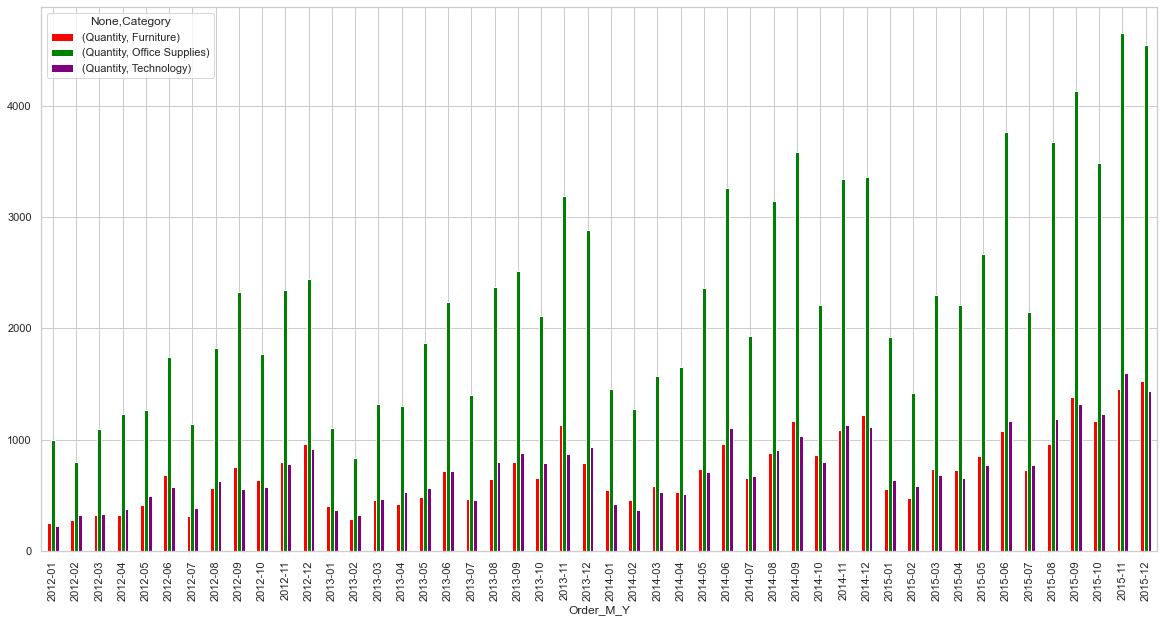

In [44]:
group_season.unstack().plot(kind='bar', color=['red', 'green', 'purple'])

### #2

## Problem 3

### #1

In [45]:
raw_returns = pd.read_csv('Returns.csv')
raw_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [46]:
raw_returns.columns = list(map(lambda x: x.replace(' ', '_'), raw_returns.columns))
raw_returns.head()

,Returned,Order_ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [47]:
raw_returns.shape

(1079, 3)

In [48]:
raw_returns.Returned.value_counts()

Yes    1079
Name: Returned, dtype: int64

In [63]:
data_returns = pd.merge(season_data, raw_returns, on='Order_ID')

# if we do an inner join without specifying the key, it joins by row index
data_returns

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region_x,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Region_y
0,9065,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,TEC-AC-5219,Technology,Accessories,"Memorex Mouse, USB",37.84,2,0.0,2.24,3.937,Medium,2012-01,2012-01,Yes,Caribbean
1,9066,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,FUR-CH-5757,Furniture,Chairs,"SAFCO Chairmat, Black",38.26,1,0.0,6.88,4.253,Medium,2012-01,2012-01,Yes,Caribbean
2,9067,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,OFF-EN-5041,Office Supplies,Envelopes,"Kraft Peel and Seal, Recycled",38.58,3,0.0,7.68,3.514,Medium,2012-01,2012-01,Yes,Caribbean
3,16316,ES-2012-DJ1351048-40923,1/15/12,1/20/12,Second Class,DJ-1351048,Don Jones,Corporate,NaN,Langen,Lower Saxony,Germany,Western Europe,Europe,TEC-CO-4570,Technology,Copiers,"Hewlett Copy Machine, Laser",526.62,2,0.0,10.50,92.100,Medium,2012-01,2012-01,Yes,Western Europe
4,16314,ES-2012-DJ1351048-40923,1/15/12,1/20/12,Second Class,DJ-1351048,Don Jones,Corporate,NaN,Langen,Lower Saxony,Germany,Western Europe,Europe,OFF-SU-4120,Office Supplies,Supplies,"Elite Letter Opener, Easy Grip",54.60,2,0.0,2.16,4.120,Medium,2012-01,2012-01,Yes,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,36706,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-BI-6345,Office Supplies,Binders,Vinyl Sectional Post Binders,90.48,3,0.2,33.93,9.140,Low,2015-12,2015-12,Yes,Western US
2216,36707,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-ST-5789,Office Supplies,Storage,"SAFCO Mobile Desk Side File, Wire Frame",42.76,1,0.0,11.12,6.210,Low,2015-12,2015-12,Yes,Western US
2217,36704,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-PA-6102,Office Supplies,Paper,Standard Line “While You Were Out” Hardbound T...,87.92,4,0.0,40.44,2.270,Low,2015-12,2015-12,Yes,Western US
2218,36705,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,California,United States,Western US,USCA,OFF-BI-5588,Office Supplies,Binders,"Performers Binder/Pad Holder, Black",22.42,1,0.2,8.41,2.390,Low,2015-12,2015-12,Yes,Western US


In [59]:
data_returns = pd.concat([season_data, raw_returns[['Returned']]], axis=1, join='inner', keys='Order_ID')

# if we do an inner join without specifying the key, it joins by row index
data_returns

O                                                                 \
    Row_ID                  Order_ID Order_Date Ship_Date       Ship_Mode   
562  20626   IN-2012-NF1859527-40916     1/8/12   1/12/12    Second Class   
399   6826   MX-2012-HL1504093-40929    1/21/12   1/27/12  Standard Class   
328  50724     AO-2012-HZ49504-40916     1/8/12   1/13/12  Standard Class   
764  49367     EN-2012-AB60042-40932    1/24/12   1/24/12        Same Day   
39   28046    IN-2012-DL128657-40918    1/10/12   1/11/12     First Class   
..     ...                       ...        ...       ...             ...   
308  49752   SF-2015-MV8190117-42362   12/24/15  12/27/15     First Class   
331  33191  US-2015-AS10090140-42341    12/3/15   12/6/15     First Class   
431  12080   ES-2015-CD1192045-42367   12/29/15  12/31/15    Second Class   
464  46523   PL-2015-CB2025103-42347    12/9/15  12/12/15     First Class   
462  17215   ES-2015-GZ1447064-42362   12/24/15  12/24/15        Same Day   

                                                                \
      Customer_ID       Customer_Name      Segment Postal_Code   
562    NF-1859527        Nicole Fjeld  Home Office         NaN   
399    HL-1504093        Hunter Lopez     Consumer         NaN   
328      HZ-49504         Henia Zydlo     Consumer         NaN   
764      AB-60042           Ann Blume    Corporate         NaN   
39      DL-128657          Dan Lawera     Consumer         NaN   
..            ...                 ...          ...         ...   
308    MV-8190117      Mike Vittorini     Consumer         NaN   
331  AS-100901408  Adam Shillingsburg     Consumer     22901.0   
431    CD-1192045         Carlos Daly     Consumer         NaN   
464    CB-2025103   Cassandra Brandow     Consumer         NaN   
462    GZ-1447064       Gary Zandusky     Consumer         NaN   

                                                                               \
                   City                 State        Country           Region   
562             Kunming                Yunnan          China     Eastern Asia   
399             Managua               Managua      Nicaragua  Central America   
328            Benguela              Benguela         Angola   Central Africa   
764             Tallinn              Harjumaa        Estonia  Northern Europe   
39             Brisbane            Queensland      Australia          Oceania   
..                  ...                   ...            ...              ...   
308      Port Elizabeth          Eastern Cape   South Africa  Southern Africa   
331     Charlottesville              Virginia  United States      Southern US   
431             Oyonnax  Auvergne-Rhône-Alpes         France   Western Europe   
464              Lublin                Lublin         Poland   Eastern Europe   
462  Reggio nell'Emilia        Emilia-Romagna          Italy  Southern Europe   

                                                              \
           Market   Product_ID         Category Sub_Category   
562  Asia Pacific  TEC-MA-5548       Technology     Machines   
399         LATAM  FUR-TA-3764        Furniture       Tables   
328        Africa  FUR-BO-4850        Furniture    Bookcases   
764        Europe  TEC-PH-3806       Technology       Phones   
39   Asia Pacific  TEC-PH-5356       Technology       Phones   
..            ...          ...              ...          ...   
308        Africa  TEC-PH-3148       Technology       Phones   
331          USCA  OFF-AR-5285  Office Supplies          Art   
431        Europe  FUR-TA-5064        Furniture       Tables   
464        Europe  TEC-CO-5997       Technology      Copiers   
462        Europe  FUR-BO-4862        Furniture    Bookcases   

                                                                              \
                                     Product_Name    Sales Quantity Discount   
562                       Panasonic Inkjet, White  2173.50        7     0.00   
399  Chromcraft Confe

In [71]:
np.sum(data_returns[data_returns['Profit'] < 0].Profit)

-36832.600000000006

In [72]:
group_loss = data_returns[data_returns['Profit'] < 0]
group_loss = group_loss.groupby(group_loss.Order_M_Y.dt.year)[['Profit']].agg('sum')
group_loss

,Profit
Order_M_Y,
2012,-5772.54
2013,-7713.03
2014,-7439.43
2015,-15907.60


### #2

In [81]:
return_1 = np.sum(data_returns.groupby(['Customer_ID'])[['Returned']].count() > 1)

return_1

Returned    547
dtype: int64

In [74]:
return_5 = data_returns.groupby(['Customer_ID'])[['Returned']].count() > 5
return_5 = return_5[return_5['Returned']==True]
return_5.count()

Returned    46
dtype: int64

### #3

<AxesSubplot:xlabel='Region'>

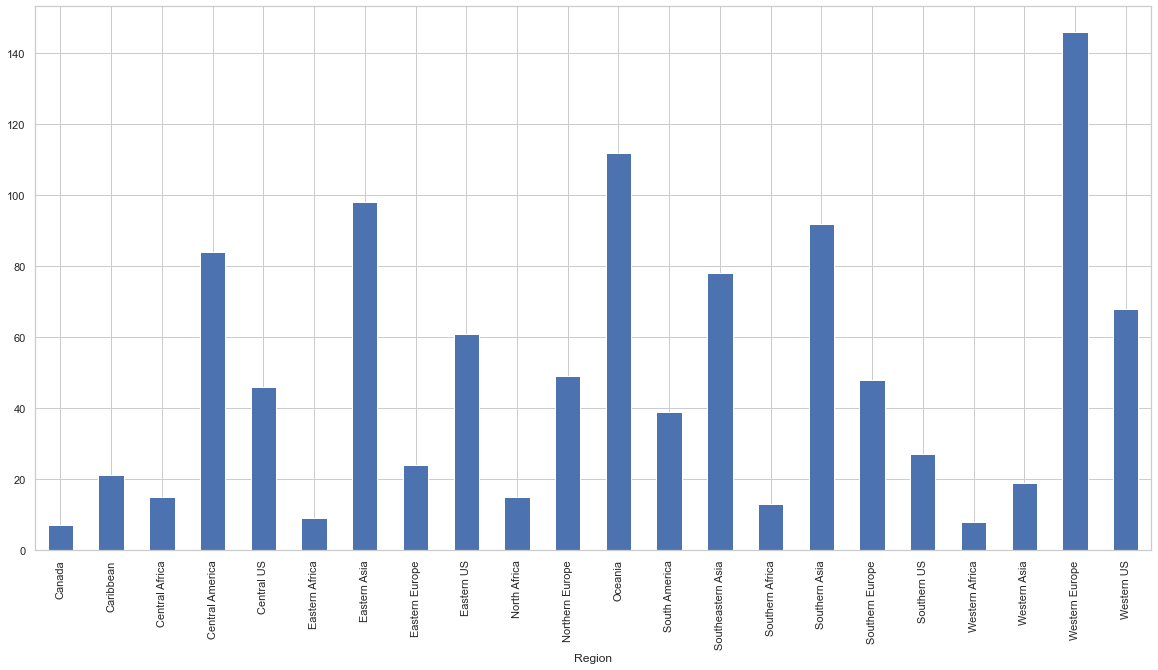

In [29]:
by_region = data_returns.groupby(['Region']).size()
by_region.plot.bar()

### #4

<AxesSubplot:xlabel='Sub_Category'>

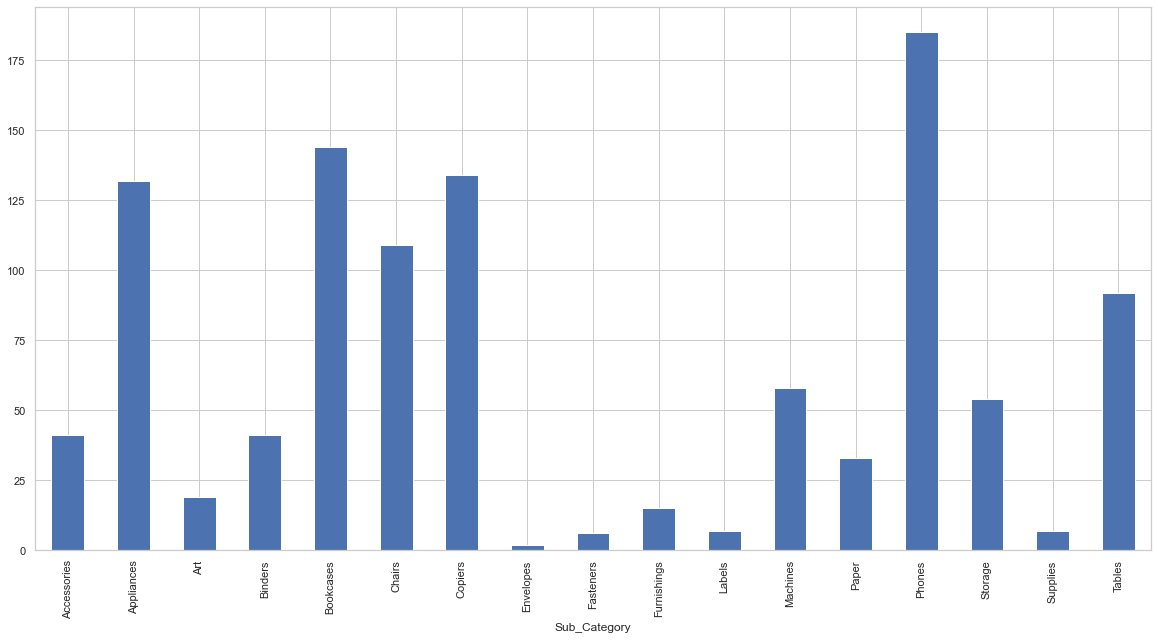

In [30]:
by_category = data_returns.groupby(['Sub_Category']).size()
by_category.plot.bar()